In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
 98% 770M/786M [00:04<00:00, 41.7MB/s]
100% 786M/786M [00:04<00:00, 194MB/s] 


In [ ]:
!pip install zipfile36
import zipfile
zip_ref=zipfile.ZipFile('/content/skin-cancer9-classesisic.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
import pathlib
import random
from skimage import color
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from numpy import asarray
from skimage.feature import hog
from keras.preprocessing.image import load_img, img_to_array
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage import io, color
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog, local_binary_pattern
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from skimage.transform import resize
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.optimizers import RMSprop
import seaborn as sns
from tensorflow.keras.losses import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam

(450, 600, 3)


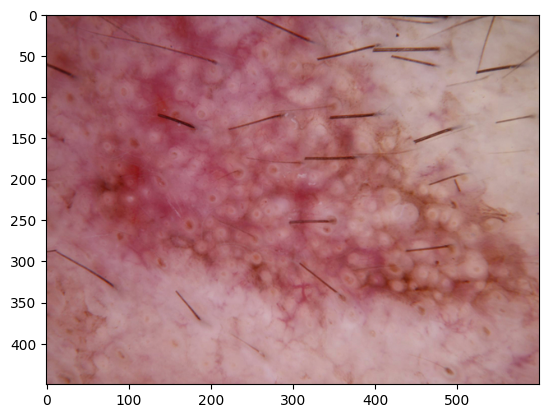

In [ ]:
image=cv2.imread('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(image.shape)

In [ ]:
import os
import cv2
import numpy as np

def read_and_resize_images(train_image, target_size=(224, 224)):
    train_image_arrays = []
    for label in os.listdir(train_image):
        label_folder = os.path.join(train_image, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                image_path = os.path.join(label_folder, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    resized_image = cv2.resize(image, target_size)
                    train_image_arrays.append(resized_image.flatten())

    return np.array(train_image_arrays)


In [ ]:
def read_labels(train_image_label):
    train_labels = []

    for label in os.listdir(train_image_label):
        label_folder = os.path.join(train_image_label, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                train_labels.append(label)

    return np.array(train_labels)

In [ ]:
def read_and_resize_images(test_image, target_size=(224, 224)):
    test_image_arrays = []
    for label in os.listdir(test_image):
        label_folder = os.path.join(test_image, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                image_path = os.path.join(label_folder, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    resized_image = cv2.resize(image, target_size)
                    test_image_arrays.append(resized_image.flatten())

    return np.array(test_image_arrays)

In [ ]:
def read_labels(test_image_label):
    test_labels = []

    for label in os.listdir(test_image_label):
        label_folder = os.path.join(test_image_label, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                test_labels.append(label)

    return np.array(test_labels)

In [ ]:
train_folder='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_folder='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [ ]:
train_image_arrays=read_and_resize_images(train_folder)
test_image_arrays=read_and_resize_images(test_folder)

In [ ]:
unique_labels=set(os.listdir(train_folder))
print(unique_labels)


{'seborrheic keratosis', 'actinic keratosis', 'dermatofibroma', 'melanoma', 'vascular lesion', 'nevus', 'squamous cell carcinoma', 'pigmented benign keratosis', 'basal cell carcinoma'}


In [ ]:
train_labels=read_labels(train_folder)
test_labels=read_labels(test_folder)

In [ ]:
train_images=train_image_arrays.reshape(-1,224,224,3)
test_images=test_image_arrays.reshape(-1,224,224,3)

In [ ]:
normalize_train_images=train_images/255.0
normalize_test_images=test_images/255.0

In [ ]:
type(normalize_train_images)

numpy.ndarray

In [ ]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
      gray_image = color.rgb2gray(image)
      hog_feature = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
      hog_features.append(hog_feature)
    return np.array(hog_features)

In [ ]:
def extract_lbp_features(images):
  lbp_features=[]
  for image in images:
    gray_image=color.rgb2gray(image)
    lbp_feature=local_binary_pattern(gray_image, 8,1,method="uniform")
    lbp_hist,_=np.histogram(lbp_feature.ravel(),bins=np.arange(0,10),range=(0,9))
    lbp_features.append(lbp_hist)
  return np.array(lbp_features)

In [ ]:
def extract_color_histogram(images):
  color_hist_features=[]
  for image in images:
    if len(image.shape) == 3:
      color_hist=[]
      for channel in range (image.shape[2]):
          hist,_=np.histogram(image[:,:,channel],bins=10,range=(0,256))
          color_hist.extend(hist)

    else:
      hist,_=np.histogram(image,bins=10,range=(0,256))
      color_hist=hist
    color_hist_features.append(color_hist)

  return np.array(color_hist_features)

In [ ]:
def extract_deep_feature_images(images):
  base_model=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
  model=Model(inputs=base_model.input,outputs=base_model.get_layer('block5_pool').output)
  deep_features=model.predict(images)
  return deep_features.reshape(len(images), -1)


In [ ]:
extract_hog_train_features=extract_hog_features(normalize_train_images)
extract_hog_test_features=extract_hog_features(normalize_test_images)

In [ ]:
extract_train_lbp_features=extract_lbp_features(normalize_train_images)
extract_test_lbp_features=extract_lbp_features(normalize_test_images)

/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:
extract_train_hist=extract_color_histogram(normalize_train_images)
extract_test_hist=extract_color_histogram(normalize_test_images)

In [ ]:
extract_train_deep=extract_deep_feature_images(normalize_train_images)
extract_test_deep=extract_deep_feature_images(normalize_test_images)

70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step


In [ ]:
all_train_feature=np.concatenate((extract_hog_train_features,extract_train_lbp_features,extract_train_hist,extract_train_deep),axis=1)
all_test_feature=np.concatenate((extract_hog_test_features,extract_test_lbp_features,extract_test_hist,extract_test_deep),axis=1)

In [ ]:
all_train_feature=np.array(all_train_feature)
all_test_feature=np.array(all_test_feature)


In [ ]:
le=LabelEncoder()
all_train_labels=le.fit_transform(train_labels)
all_test_labels=le.fit_transform(test_labels)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(all_train_feature,all_train_labels,test_size=0.20,random_state=76)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
all_train_feature.shape,all_test_feature.shape,all_train_labels.shape,all_test_labels.shape

((2239, 51371), (118, 51371), (2239,), (118,))

In [ ]:
new_model=Sequential([Dense(256,activation="relu",kernel_regularizer=regularizers.l2(0.01),input_shape=(x_train.shape[1],)),
                  Dropout(0.3),
                                  Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
                  Dropout(0.3),
                                     Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
                    Dropout(0.3),
                 Dense(9,activation="softmax") ])

In [ ]:
optimizer=Adam(learning_rate=0.0001)
new_model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
new_history=new_model.fit(x_train,y_train,epochs=100,batch_size=64,validation_split=0.1,validation_data=(x_test,y_test))

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.1172 - loss: 10.5888 - val_accuracy: 0.2589 - val_loss: 11.4218
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3509 - loss: 9.3001 - val_accuracy: 0.3661 - val_loss: 10.7055
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4478 - loss: 8.7308 - val_accuracy: 0.4062 - val_loss: 10.1502
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5526 - loss: 8.2994 - val_accuracy: 0.4241 - val_loss: 9.6891
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6254 - loss: 8.0253 - val_accuracy: 0.4487 - val_loss: 9.4299
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6760 - loss: 7.7262 - val_accuracy: 0.4353 - val_loss: 9.2435
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7001 - loss: 7.5850 - val_accuracy: 0.4531 - val_loss: 9.0729
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7453 - loss: 7.4516 - val_accurac

In [ ]:
new_model.evaluate(x_test,y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5157 - loss: 3.9114


[3.396242141723633, 0.5178571343421936]

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.30      0.17      0.21        36
           1       0.68      0.57      0.62        91
           2       0.17      0.44      0.24         9
           3       0.65      0.54      0.59        90
           4       0.45      0.57      0.50        60
           5       0.56      0.59      0.58        98
           6       0.00      0.00      0.00         9
           7       0.29      0.33      0.31        30
           8       0.76      0.76      0.76        25

    accuracy                           0.52       448
   macro avg       0.43      0.44      0.43       448
weighted avg       0.54      0.52      0.52       448



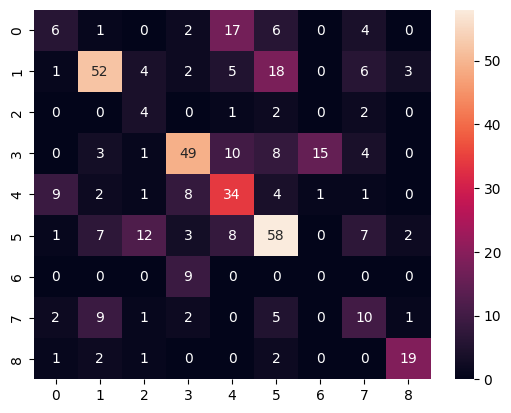

In [ ]:
predictions=new_model.predict(x_test)
pred = np.argmax(predictions, axis=1)
cm=confusion_matrix(pred,y_test)
report=classification_report(pred,y_test)
sns.heatmap(cm,annot=True)
print(report)

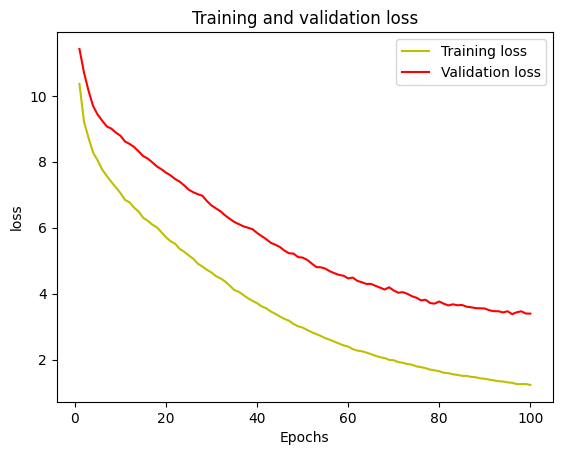

In [ ]:
import matplotlib.pyplot as plt
loss=new_history.history['loss']
val_loss=new_history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
from keras.optimizers import Adam
optimizer=Adam(learning_rate=0.0001)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
x_train_border,y_train_border=smote.fit_resample(x_train,y_train)

In [ ]:
x_train_border.shape

(3429, 51371)

In [ ]:
x_train_new,x_test,y_train_new,y_test=train_test_split(x_train_border,y_train_border,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train_new)

In [ ]:
new_model=Sequential([Dense(256,activation="relu",kernel_regularizer=regularizers.l2(0.01),input_shape=(x_train_new.shape[1],)),
                  Dropout(0.3),
                                  Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
                  Dropout(0.3),
                                     Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
                    Dropout(0.3),
                 Dense(9,activation="softmax") ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
new_model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
new_history=new_model.fit(x_train_new,y_train_new,epochs=100,batch_size=64,validation_split=0.1,validation_data=(x_test,y_test))

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.2272 - loss: 9.9458 - val_accuracy: 0.6224 - val_loss: 8.4103
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5527 - loss: 8.4197 - val_accuracy: 0.7114 - val_loss: 7.9033
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6720 - loss: 7.8779 - val_accuracy: 0.7289 - val_loss: 7.6348
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7409 - loss: 7.4832 - val_accuracy: 0.7493 - val_loss: 7.4398
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7920 - loss: 7.1801 - val_accuracy: 0.7536 - val_loss: 7.2435
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8144 - loss: 6.9822 - val_accuracy: 0.7726 - val_loss: 7.0679
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8376 - loss: 6.7256 - val_accuracy: 0.7668 - val_loss: 6.9083
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8603 - loss: 6.5248 - val_accuracy: 

In [ ]:
new_model.evaluate(x_test,y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7965 - loss: 1.2308


[1.312214970588684, 0.7740525007247925]

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        75
           1       0.75      0.70      0.73        70
           2       0.99      0.93      0.96        81
           3       0.62      0.75      0.68        71
           4       0.76      0.75      0.75        83
           5       0.38      0.65      0.48        46
           6       0.90      0.71      0.79        84
           7       0.80      0.78      0.79        85
           8       1.00      0.88      0.94        91

    accuracy                           0.77       686
   macro avg       0.78      0.77      0.77       686
weighted avg       0.81      0.77      0.78       686



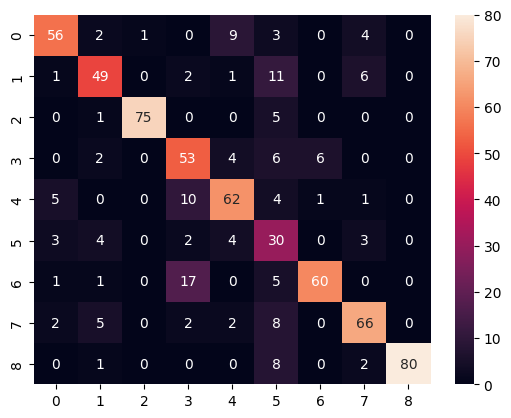

In [ ]:
predictions=new_model.predict(x_test)
pred = np.argmax(predictions, axis=1)
cm=confusion_matrix(pred,y_test)
report=classification_report(pred,y_test)
sns.heatmap(cm,annot=True)
print(report)

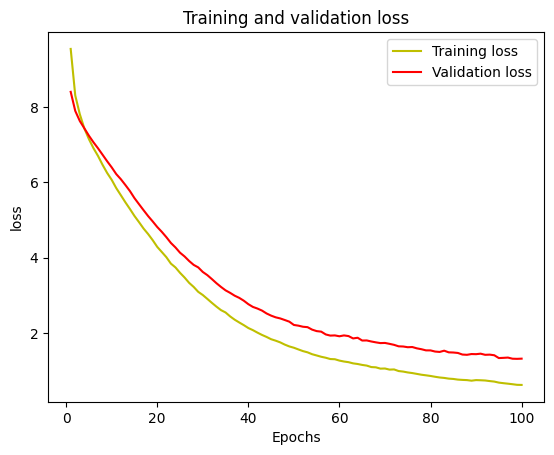

In [ ]:
import matplotlib.pyplot as plt
loss=new_history.history['loss']
val_loss=new_history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def plot_multiclass_roc(clf,x_test,y_test,n_classes,figsize=(15,15)):
  y_score=clf.predict(x_test)
  fpr=dict()
  tpr=dict()
  roc_auc=dict()
  y_test_dummies=pd.get_dummies(y_test,drop_first=False).values
  for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test_dummies[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

  fig,ax=plt.subplots(figsize=figsize)
  ax.plot([0,1],[0,1],'k--')
  ax.set_xlim([0.0,1.0])
  ax.set_ylim([0.0,1.05])
  ax.set_xlabel("false positive rate")
  ax.set_ylabel("true positive rate")
  ax.set_title("reciever operating characteristic example")
  for i in range(n_classes):
    ax.plot(fpr[i],tpr[i],label='ROC curve(area=%0.2f) for label %i'%(roc_auc[i],i))
  ax.legend(loc="best")
  ax.grid(alpha=.4)
  plt.show()

14/14 [==============================] - 0s 2ms/step


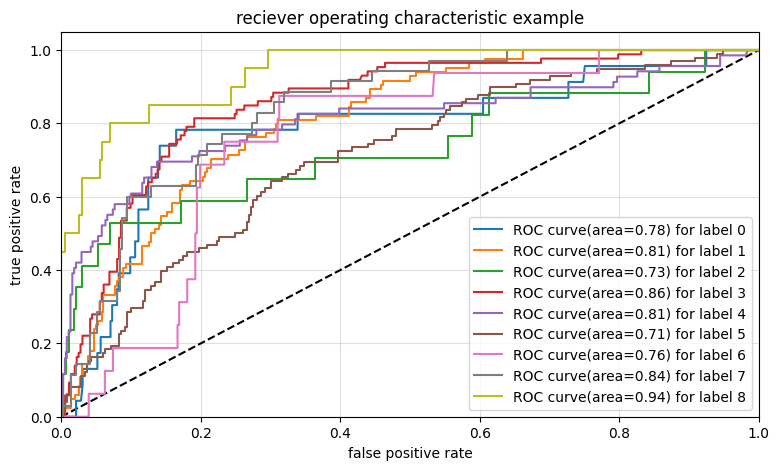

In [ ]:
plot_multiclass_roc(model2,x_test,y_test,n_classes=9,figsize=(9,5))